## Anomaly detection

https://hackmd.io/@shaoeChen/SJkSrunVL#%E6%9D%8E%E5%AE%8F%E6%AF%85_Anomaly-Detection


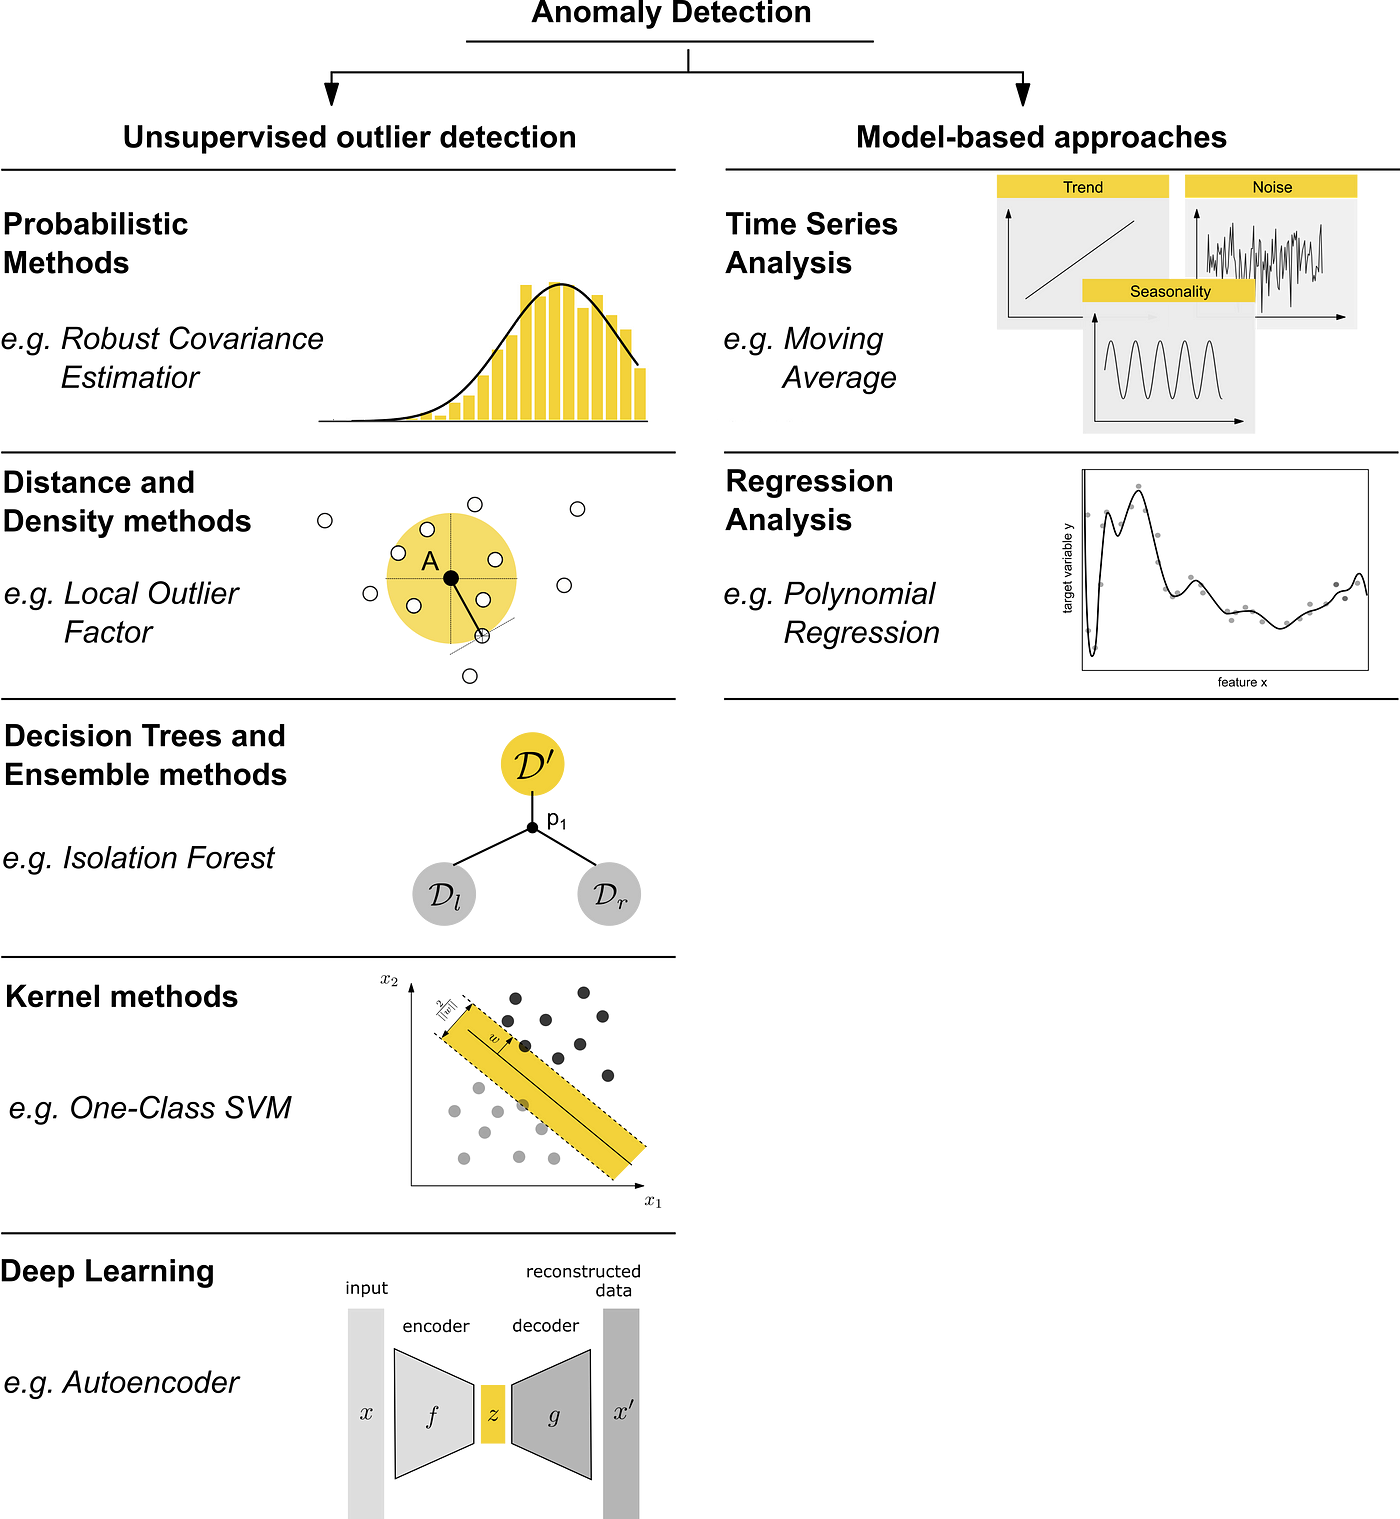

## 1. 傳統機器學習方法

- 統計方法
Z-Score: 使用標準差來衡量數據點與均值的距離。<br>
IQR (Interquartile Range): 利用數據的四分位距離來檢測異常值。<br>

- 距離密度方法
K-Nearest Neighbors (KNN): 計算每個點與其最近的K個鄰居的距離，距離過大的點可能是異常值。<br>
Local Outlier Factor (LOF): 基於密度的異常檢測方法，通過比較每個點的密度與其鄰居的密度來判斷異常。<br>

- 聚類方法
K-Means: 聚類後，與聚類中心距離過大的點可能是異常。<br>
DBSCAN (Density-Based Spatial Clustering of Applications with Noise): 可以自動識別異常點（即噪聲）。<br>


## 2. 深度學習方法

- 自編碼器（Autoencoder）
Autoencoder: 將數據壓縮並重建，重建誤差大的數據點可能是異常。<br>
Variational Autoencoder (VAE): 基於概率的自編碼器，用於生成和檢測異常。<br>

- 生成對抗網絡（GANs）
Generative Adversarial Networks (GANs): 通過生成模型和判別模型的對抗訓練，生成異常點的樣本並檢測異常。<br>

- 遞歸神經網絡（RNN）
LSTM (Long Short-Term Memory): 用於處理時間序列數據，通過預測未來數據點並比較實際數據與預測數據的差異來檢測異常。<br>
GRU (Gated Recurrent Unit): 與LSTM類似，用於時間序列異常檢測。<br>

- 圖神經網絡（GNN）
Graph Convolutional Networks (GCNs): 用於處理圖結構數據中的異常檢測，例如社交網絡中的異常行為檢測。<br>

--- 
# 3 .綜合方法
## 3.1 集成學習（Ensemble Learning）

Isolation Forest: 將數據集隨機分割成樹結構，異常點通常在樹的較淺層處分離。<br>
Random Cut Forest: 擴展了Isolation Forest的概念，用於大規模異常檢測。<br>

## 3.2 Hybrid Methods
結合上述多種方法，例如將自編碼器和KNN結合，先用自編碼器降維，再用KNN檢測異常。


---


## 統計 Z-Score
使用標準差來衡量數據點與均值的距離

- 優點: 簡單易用，適用於數據正態分布的情況。
- 缺點: 對非正態分布的數據不太適用，對異常值敏感。
- 注意事項: 使用前需確保數據正態分布，適合於小規模數據集。

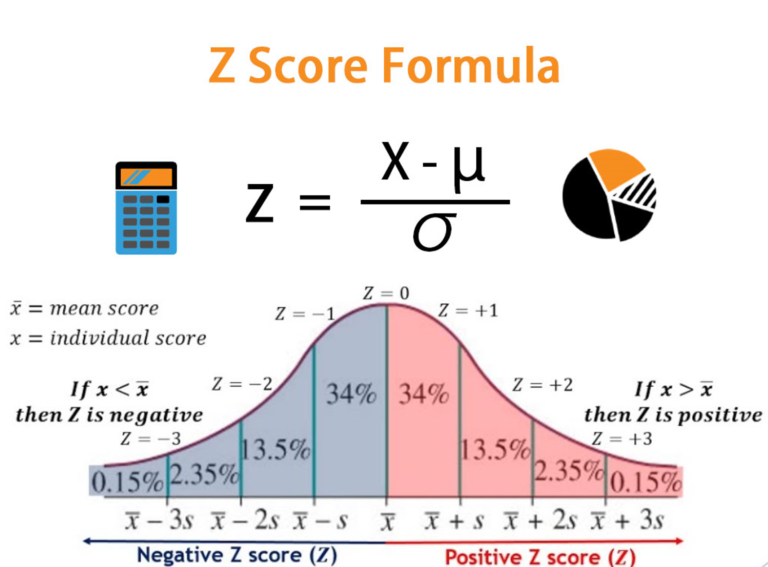

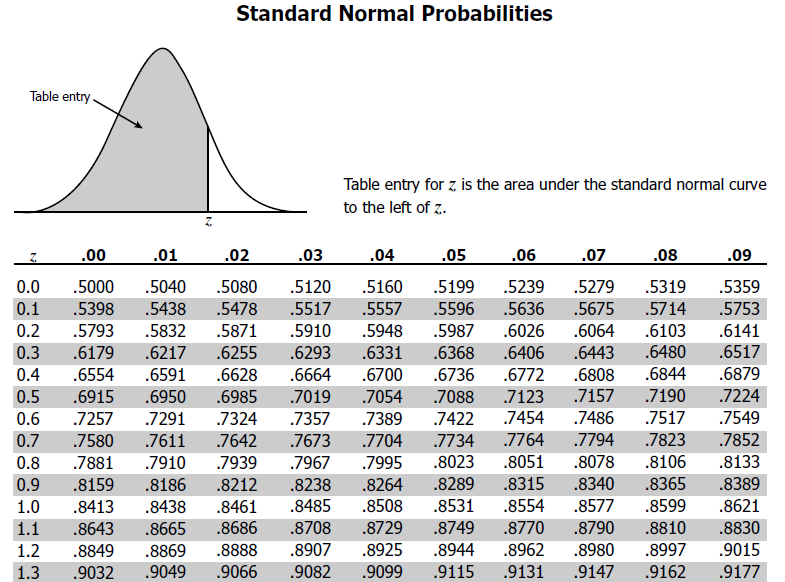

[ref](https://byjus.com/maths/z-score-table/)

In [1]:
import numpy as np
import pandas as pd

# 生成範例數據
data = [10, 12, 12, 13, 12, 14, 16, 15, 14, 22, 24, 100]

# 將數據轉為 DataFrame
df = pd.DataFrame(data, columns=['value'])

# 計算平均值和標準差
mean = df['value'].mean()
std = df['value'].std()

# 計算 z score
df['z_score'] = (df['value'] - mean) / std

# 設置 z score 閾值來判斷離群值
threshold = 3
df['outlier'] = df['z_score'].abs() > threshold

# 顯示結果
print(df)


    value   z_score  outlier
0      10 -0.481720    False
1      12 -0.401433    False
2      12 -0.401433    False
3      13 -0.361290    False
4      12 -0.401433    False
5      14 -0.321146    False
6      16 -0.240860    False
7      15 -0.281003    False
8      14 -0.321146    False
9      22  0.000000    False
10     24  0.080287    False
11    100  3.131178     True


## 建立複雜 2維 demo 資料

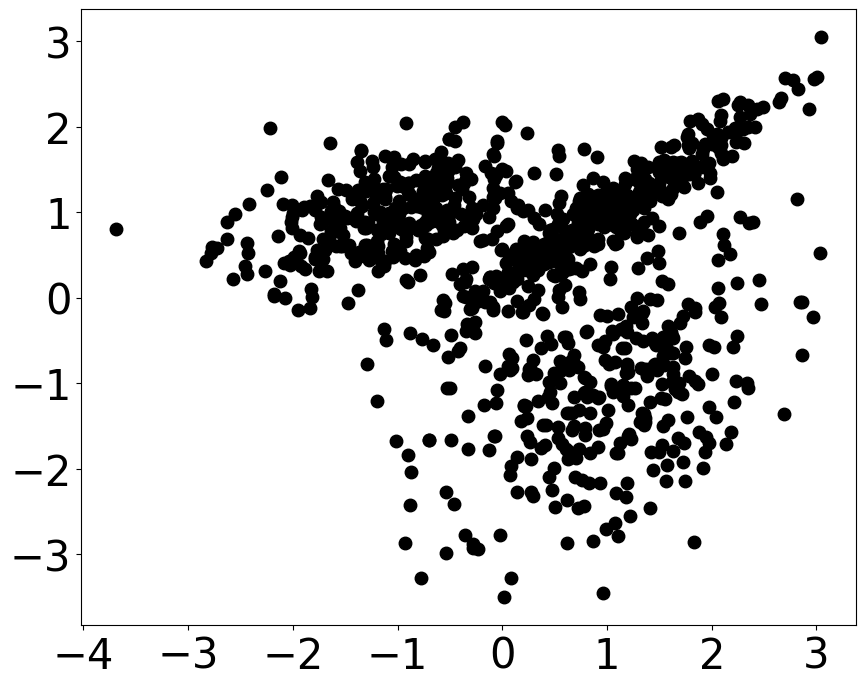

In [2]:
import os 
import numpy as np
import random
from random import sample
from numpy import random
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt

X, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=3,  # Reduced to 4 classes to satisfy the condition
    random_state=150
)

# Plot the dataset
plt.rcParams["figure.figsize"] = (10, 8)
plt.plot(X[:, 0], X[:, 1], "ko", markersize=9)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

## 距離密度方法 K-Nearest Neighbors (KNN)

計算每個點與其最近的K個鄰居的距離，距離過大的點可能是異常值。

- 優點: 簡單直觀，適用於非線性數據。
- 缺點: 計算量大，對高維數據效果不佳。
- 注意事項: 選擇合適的K值，適用於中小規模數據集。


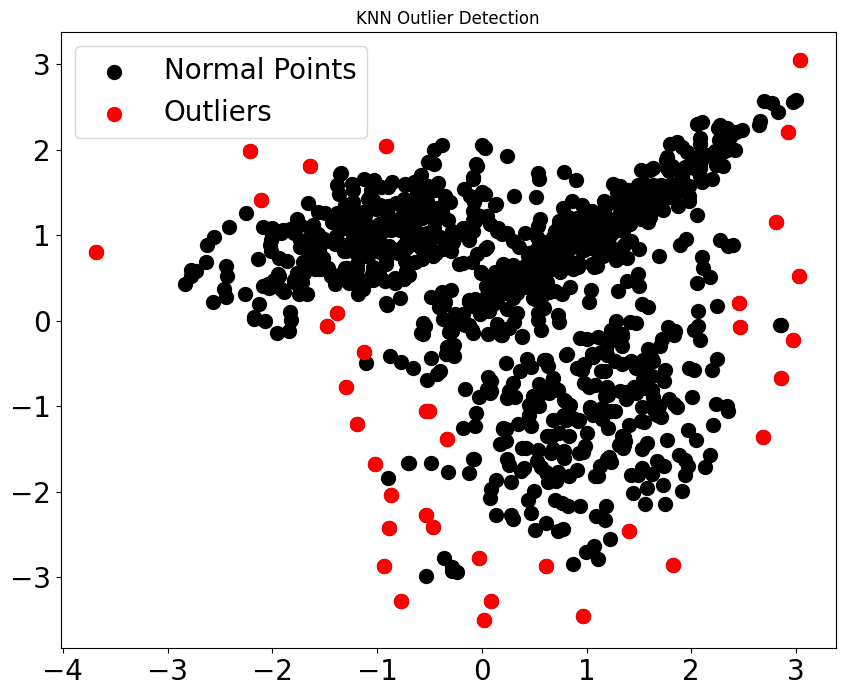

In [3]:
# K-Nearest Neighbors (KNN) 方法離群值檢測
from sklearn.neighbors import NearestNeighbors


k = 5
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(X)
distances, indices = nbrs.kneighbors(X)
mean_distances = distances.mean(axis=1)
threshold = mean_distances.mean() + 2 * mean_distances.std()
knn_outliers = mean_distances > threshold

# 繪製 KNN 離群值檢測結果
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c='k', marker='o', s=100, label='Normal Points')
plt.scatter(X[knn_outliers, 0], X[knn_outliers, 1], c='r', marker='o', s=100, label='Outliers')
plt.title('KNN Outlier Detection')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


## 距離密度方法 Local Outlier Factor (LOF)
基於密度的異常檢測方法，通過比較每個點的密度與其鄰居的密度來判斷異常

- 優點: 考慮局部密度差異，能夠檢測局部異常。
- 缺點: 計算複雜度高，對參數敏感。
- 注意事項: 需要調整參數以獲得最佳效果，適用於局部異常檢測。

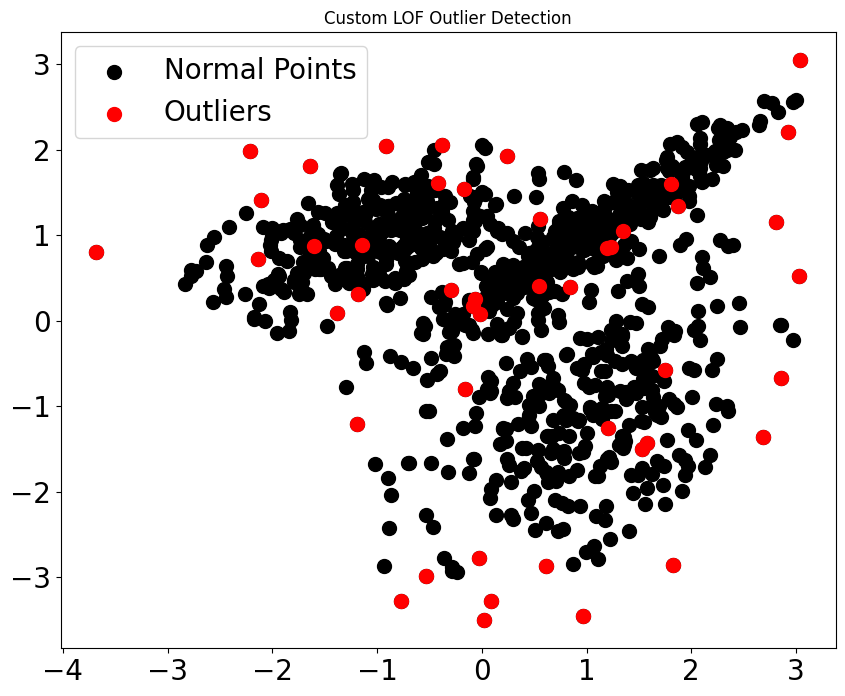

In [4]:
from sklearn.neighbors import NearestNeighbors

class CustomLOF:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.nbrs = NearestNeighbors(n_neighbors=n_neighbors)
    
    def fit(self, X):
        self.nbrs.fit(X)
        distances, indices = self.nbrs.kneighbors(X)
        self.lrd = 1 / (np.mean(distances, axis=1) + 1e-10)
        # print(self.lrd)

        return self
    
    def score_samples(self, X):
        distances, indices = self.nbrs.kneighbors(X)

        lrd_ratios = np.array([
            np.sum(self.lrd[indices[i]]) / (self.lrd[i] * self.n_neighbors)
            for i in range(len(X))
        ])
        self.lof_scores = lrd_ratios
        return self.lof_scores

# 使用自製的 LOF 算法檢測離群值
lof = CustomLOF(n_neighbors=5)
lof.fit(X)
lof_scores = lof.score_samples(X)

# 設置 LOF 分數閾值來判斷離群值，這裡選擇 1.5 作為閾值（可以根據具體情況調整）
threshold = 1.6
lof_outliers = lof_scores > threshold

# 繪製 LOF 離群值檢測結果
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c='k', marker='o', s=100, label='Normal Points')
plt.scatter(X[lof_outliers, 0], X[lof_outliers, 1], c='r', marker='o', s=100, label='Outliers')
plt.title('Custom LOF Outlier Detection')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


## 聚類方法 K-Means (非監督)
聚類後，與聚類中心距離過大的點可能是異常。

- 優點: 簡單高效，計算速度快。
- 缺點: 需要預先設定聚類數，對異常值敏感。
- 注意事項: 適用於數據分布均勻的情況，對初始中心點敏感。


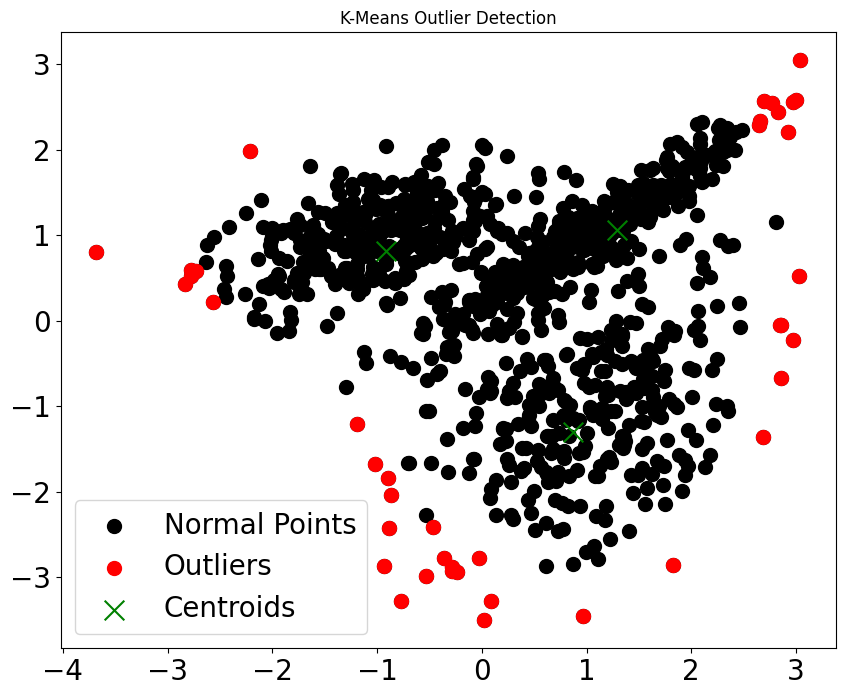

In [14]:
from sklearn.cluster import KMeans

# 應用 K-Means 聚類
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 計算每個點到其最近的簇中心的距離
distances = np.linalg.norm(X - centroids[labels], axis=1)

# 設定閾值來標記離群值
threshold = np.mean(distances) + 2 * np.std(distances)
kmeans_outliers = distances > threshold

# 繪製 K-Means 離群值檢測結果
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c='k', marker='o', s=100, label='Normal Points')
plt.scatter(X[kmeans_outliers, 0], X[kmeans_outliers, 1], c='r', marker='o', s=100, label='Outliers')
plt.scatter(centroids[:, 0], centroids[:, 1], c='g', marker='x', s=200, label='Centroids')
plt.title('K-Means Outlier Detection')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## 聚類方法 DBSCAN (Density-Based Spatial Clustering of Applications with Noise) (非監督)
DBSCAN 是一種基於密度的聚類方法，可以找出任意形狀的聚類。它將密度高的點視為核心點，將密度適中的點視為邊界點，將密度低的點視為雜訊。

- 優點: 不需要預先設定聚類數，能夠識別噪聲點。
- 缺點: 對參數敏感，計算複雜度高。
- 注意事項: 需仔細調整參數eps和min_samples，適用於大規模數據集。

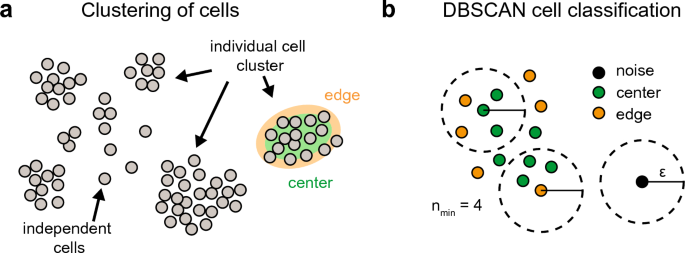


- 核心點 (Core Point)：<br>
對於一個數據點，如果在給定的距離 <br>
ϵ 半徑內有至少 min_samples 個其他數據點，則該點被視為核心點。<br>

- 邊界點 (Border Point)：<br>
如果一個數據點在核心點的 <br>
ϵ 半徑內，但該點本身不是核心點，它被稱為邊界點。<br>

- 噪聲點 (Noise Point)：<br>
如果一個數據點既不是核心點，也不是邊界點，則它被標記為噪聲點，標籤為 -1。<br>


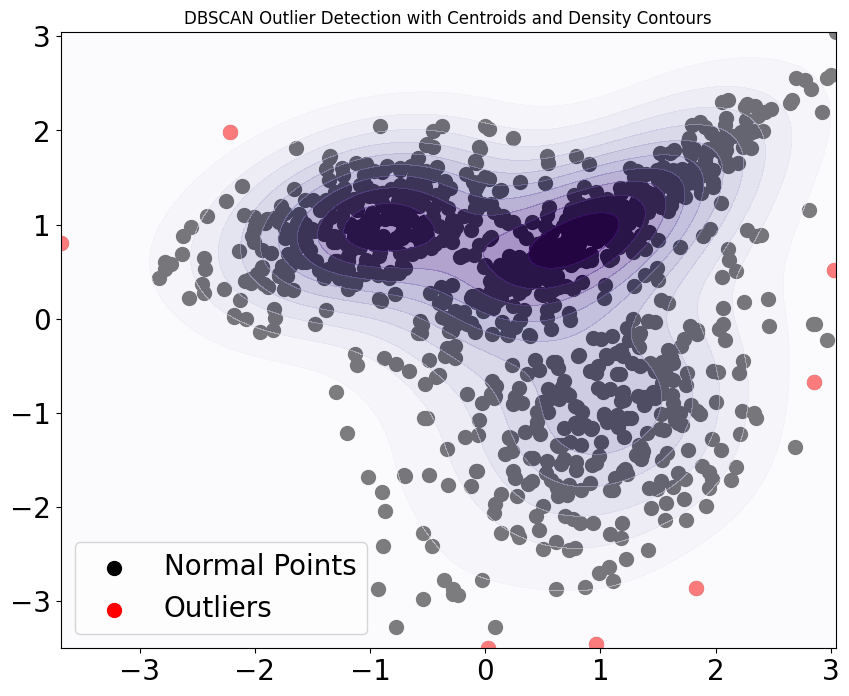

In [10]:

from sklearn.cluster import DBSCAN
from sklearn.neighbors import KernelDensity


# 應用 DBSCAN 聚類
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_


# 標記離群值 (DBSCAN 中標記為 -1 的點)
dbscan_outliers = labels == -1

# 繪製 DBSCAN 離群值檢測結果
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c='k', marker='o', s=100, label='Normal Points')
plt.scatter(X[dbscan_outliers, 0], X[dbscan_outliers, 1], c='r', marker='o', s=100, label='Outliers')

# 繪製機率密度區域
kde = KernelDensity(bandwidth=0.5)
kde.fit(X)
x_d = np.linspace(X[:, 0].min(), X[:, 0].max(), 1000)
y_d = np.linspace(X[:, 1].min(), X[:, 1].max(), 1000)
X_d, Y_d = np.meshgrid(x_d, y_d)
xy_sample = np.vstack([X_d.ravel(), Y_d.ravel()]).T
Z_d = np.exp(kde.score_samples(xy_sample))
Z_d = Z_d.reshape(X_d.shape)

plt.contourf(X_d, Y_d, Z_d, levels=10, cmap="Purples", alpha=0.5)

plt.title('DBSCAN Outlier Detection with Centroids and Density Contours')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


## 深度學習方法 Autoencoder (去雜訊)

- 優點: 自動提取特徵，適合高維數據。
- 缺點: 訓練時間長，對超參數敏感。
- 注意事項: 需要大量數據進行訓練，適用於複雜數據結構。
  
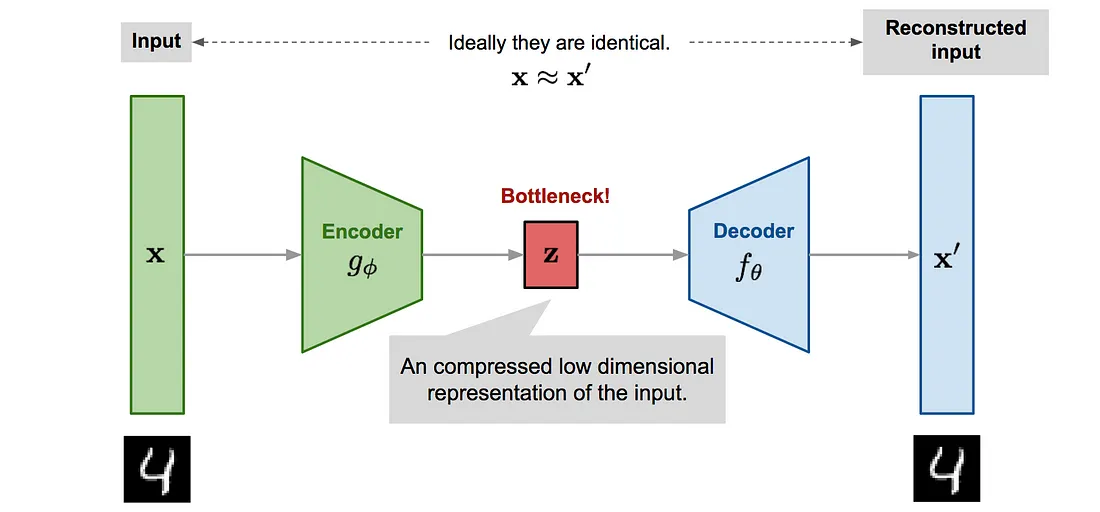
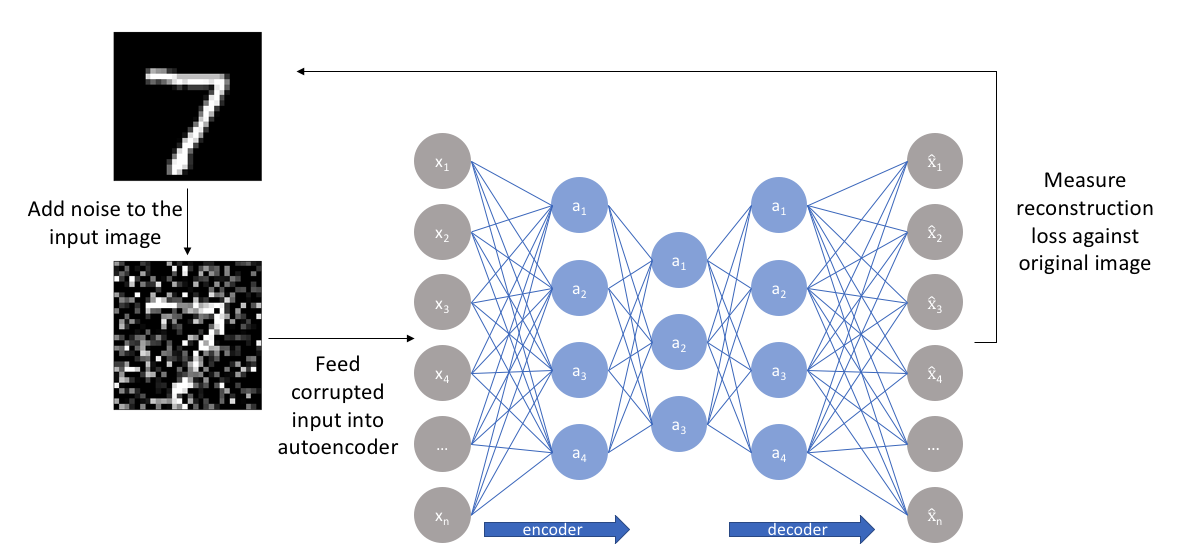

## in computer vision

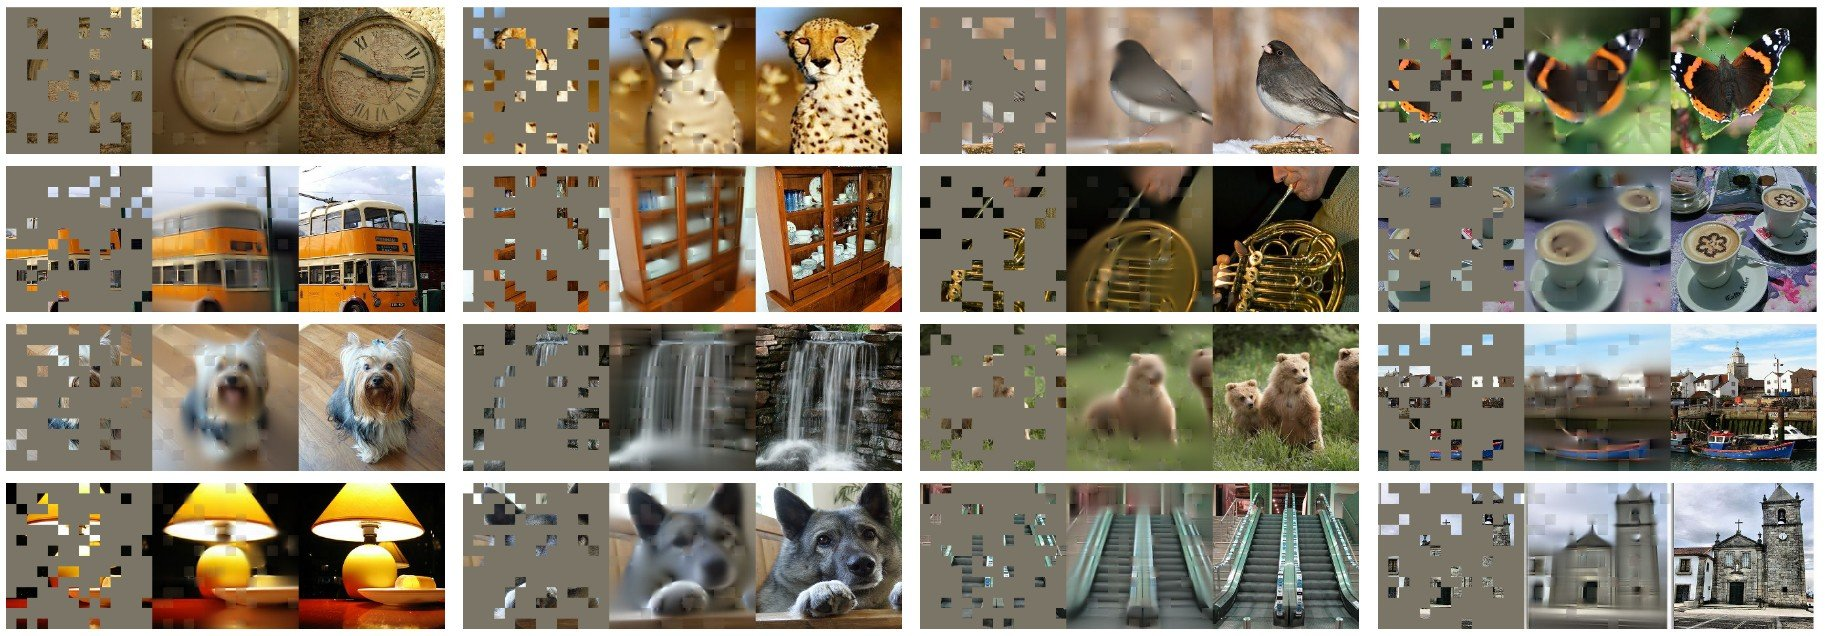

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 32)          9248

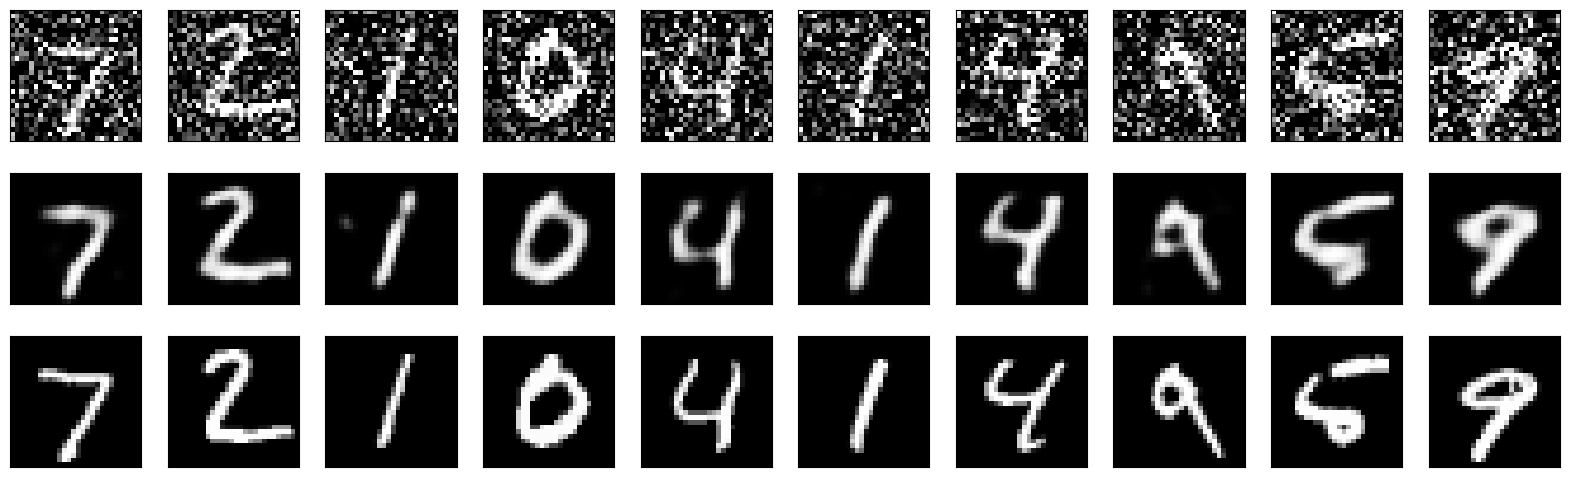

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 加載 MNIST 資料集
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# 添加噪聲
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 定義自動編碼器
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

# 訓練自動編碼器
autoencoder.fit(x_train_noisy, x_train,
                epochs=3,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# 預測去雜訊的圖片
decoded_imgs = autoencoder.predict(x_test_noisy)

# 視覺化結果
n = 10  # 展示的數量
plt.figure(figsize=(20, 6))
for i in range(n):
    # 顯示原始有噪聲的圖片
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # 顯示去雜訊後的圖片
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 顯示原始圖片
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## 深度學習方法 Variational Autoencoder (VAE)

- 優點: 基於概率模型，生成能力強。
- 缺點: 訓練複雜，對參數敏感。
- 注意事項: 需調整變分損失函數，適用於生成異常檢測。
  
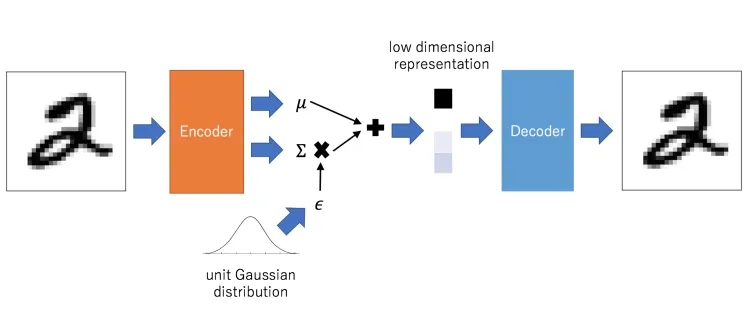

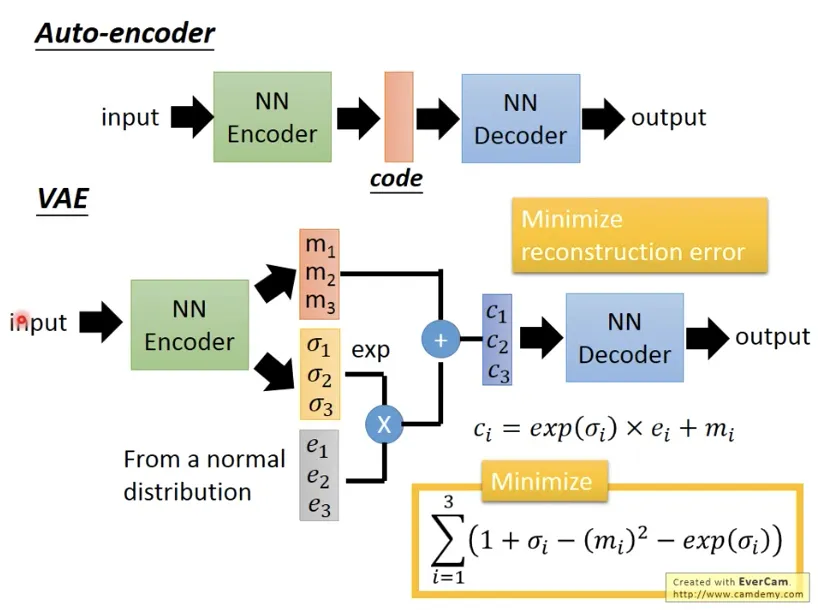

### VAE的內部結構包括一個編碼器(Encoder)和一個解碼器(Decoder)。

編碼器接收輸入,並輸出三個向量:mean (μ)、standard deviation (σ)和一個從標準正態分佈中抽樣的向量 (ε)。

利用 μ、σ和ε計算出一個新的向量 z = μ + σ * ε,作為隱藏層的表示。

隱藏層的向量 z 會輸入到解碼器中,解碼器則試圖重建原始輸入。

### VAE的損失函數包含兩部分:

重建誤差(reconstruction error): 輸入和輸出之間的差距,用來最小化重建誤差
KL散度(KL divergence): 隱藏層向量 z 與標準正態分佈之間的差異,用來讓 z 盡可能接近標準正態分佈

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K

# 設定參數
latent_dim = 2  # 潛在空間的維度
input_shape = (28, 28, 1)  # MNIST 資料集的輸入形狀

# Encoder
inputs = layers.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation='relu')(x)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

# 取樣函數
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Decoder
decoder_input = layers.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation='relu')(decoder_input)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)

decoder = models.Model(decoder_input, decoder_output, name="decoder")

# VAE 模型
vae_output = decoder(z)
vae = models.Model(inputs, vae_output, name="vae")

# VAE 損失函數
reconstruction_loss = tf.reduce_mean(tf.reduce_sum(tf.keras.losses.binary_crossentropy(inputs, vae_output), axis=(1, 2)))
kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1))
vae_loss = reconstruction_loss + kl_loss
vae.add_loss(vae_loss)

# 編譯模型
vae.compile(optimizer='adam')
vae.summary()

# 加載資料集
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255
x_test = np.expand_dims(x_test, -1).astype("float32") / 255

# 訓練模型
vae.fit(x_train, x_train, epochs=5, batch_size=256, validation_data=(x_test, x_test))


Model: "vae"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 14, 14, 32)           320       ['input_3[0][0]']             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 7, 7, 64)             18496     ['conv2d_2[0][0]']            
                                                                                                  
 flatten_1 (Flatten)         (None, 3136)                 0         ['conv2d_3[0][0]']            
                                                                                                

313/313 [==============================] - 10s 31ms/step


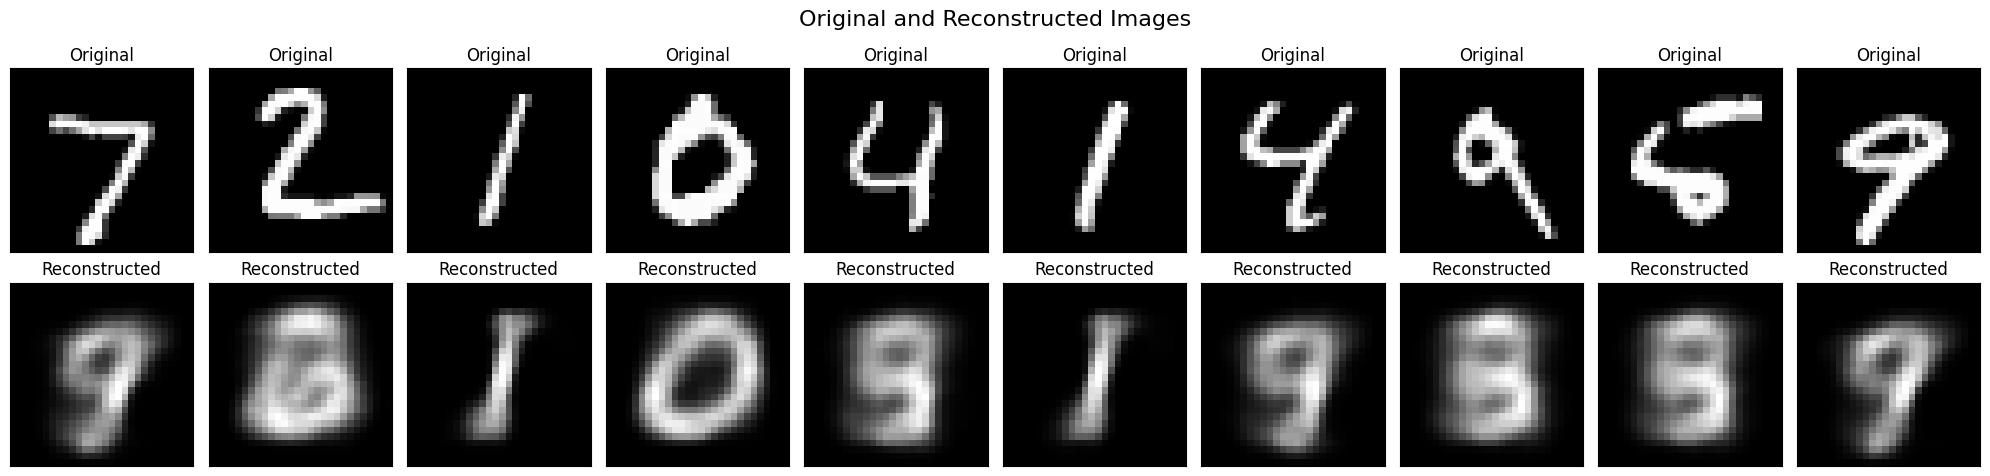

In [22]:
import matplotlib.pyplot as plt

# 定義一個函數來顯示圖片
def plot_results(models, data, batch_size=128, model_name="vae_mnist"):
    encoder, decoder = models
    x_test, y_test = data

    # 顯示原始圖片和生成的圖片
    decoded_imgs = vae.predict(x_test)


    n = 10  # 展示的數量
    plt.figure(figsize=(20, 5))
    
    # 添加標籤
    plt.suptitle('Original and Reconstructed Images', fontsize=16)

    for i in range(n):
        # 顯示原始圖片
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        ax.set_title("Original", fontsize=12)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # 顯示重建圖片
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
        ax.set_title("Reconstructed", fontsize=12)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.tight_layout()
    # plt.subplots_adjust(top=0.85)
    plt.show()

# 使用訓練好的 VAE 模型來顯示結果
plot_results((vae, decoder), (x_test, None))


## 利用 AE 對原始躁點數據進行重構，使的模型輸出相對保守。

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# 加載波士頓房價數據集
boston = load_boston()
X = boston.data
y = boston.target

# 添加噪聲
noise_factor = 0.5
X_noisy = X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape)

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

# 構建自動編碼器模型
input_dim = X_train.shape[1]
encoding_dim = 32

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='relu')(encoder)
decoder = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# 訓練自動編碼器
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, validation_split=0.2, verbose=1)

# 使用自動編碼器進行去噪
X_train_denoised = autoencoder.predict(X_train)
X_test_denoised = autoencoder.predict(X_test)

# 使用去噪前的數據進行回歸
regressor_noisy = LinearRegression()
regressor_noisy.fit(X_train, y_train)
y_pred_noisy = regressor_noisy.predict(X_test)
mse_noisy = mean_squared_error(y_test, y_pred_noisy)
r2_noisy = r2_score(y_test, y_pred_noisy)

# 使用去噪後的數據進行回歸
regressor_denoised = LinearRegression()
regressor_denoised.fit(X_train_denoised, y_train)
y_pred_denoised = regressor_denoised.predict(X_test_denoised)
mse_denoised = mean_squared_error(y_test, y_pred_denoised)
r2_denoised = r2_score(y_test, y_pred_denoised)




C:\Users\xdxd2\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

Epoch 1/10


11/11 [==============================] - 3s 49ms/step - loss: 32804.9375 - val_loss: 28439.7461
Epoch 2/10
11/11 [==============================] - 0s 12ms/step - loss: 24575.6152 - val_loss: 20803.7520
Epoch 3/10
11/11 [==============================] - 0s 13ms/step - loss: 17633.1387 - val_loss: 14625.3564
Epoch 4/10
11/11 [==============================] - 0s 12ms/step - loss: 11953.9043 - val_loss: 9547.6455
Epoch 5/10
11/11 [==============================] - 0s 11ms/step - loss: 7615.6914 - val_loss: 5969.2139
Epoch 6/10
11/11 [==============================] - 0s 10ms/step - loss: 4636.6558 - val_loss: 3913.9622
Epoch 7/10
11/11 [==============================] - 0s 9ms/step - loss: 3106.5325 - val_loss: 2848.7302
Epoch 8/10
11/11 [==============================] - 0s 8ms/step - loss: 2319.4934 - val_loss: 2242.9668
Epoch 9/10
11/11 [==============================] - 0s 8ms/step - loss: 1908.1465 - val_loss: 1918.7786
Epoch 10/10
4/4 [==============================] - 0s 3ms/step

Noisy Data - Mean Squared Error: 27.111886792796177, R²: 0.6302947205993187
Denoised Data - Mean Squared Error: 37.999575291809364, R²: 0.4818271517680417


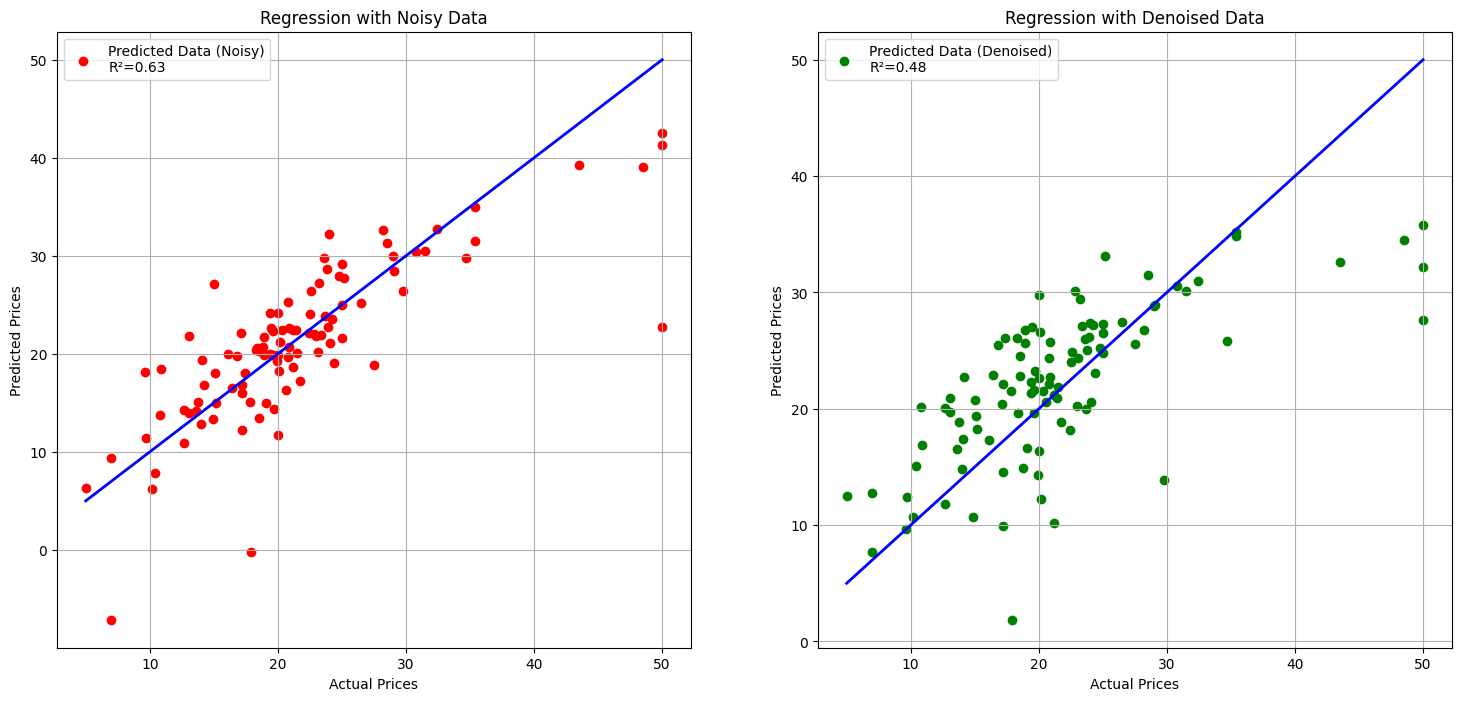

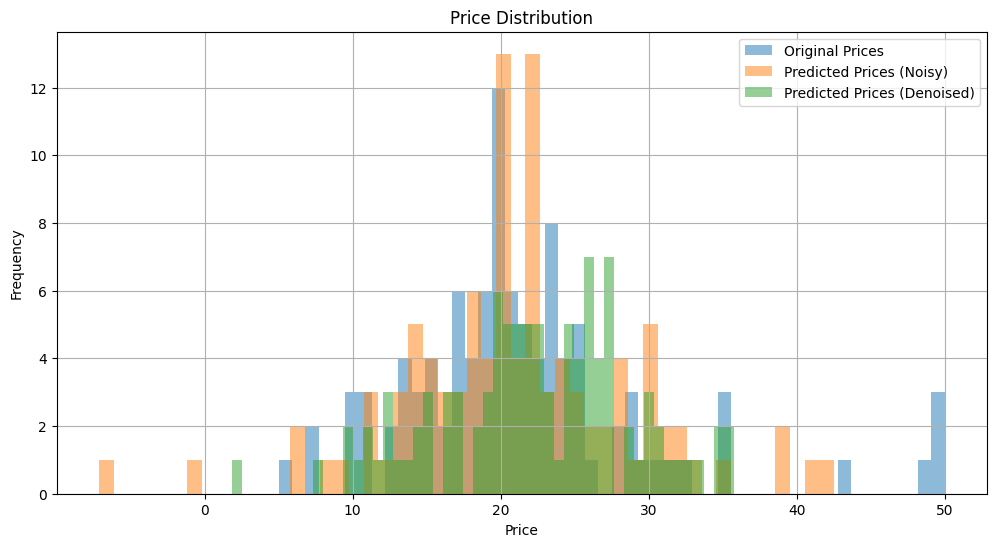

In [37]:
print(f"Noisy Data - Mean Squared Error: {mse_noisy}, R²: {r2_noisy}")
print(f"Denoised Data - Mean Squared Error: {mse_denoised}, R²: {r2_denoised}")

# 繪製結果
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_noisy, color='red', label=f'Predicted Data (Noisy)\nR²={r2_noisy:.2f}')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', lw=2)
plt.title("Regression with Noisy Data")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_denoised, color='green', label=f'Predicted Data (Denoised)\nR²={r2_denoised:.2f}')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', lw=2)
plt.title("Regression with Denoised Data")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.grid(True)

plt.show()

# 繪製去噪前後的價格分布
plt.figure(figsize=(12, 6))
plt.hist(y_test, bins=50, alpha=0.5, label='Original Prices')
plt.hist(y_pred_noisy, bins=50, alpha=0.5, label='Predicted Prices (Noisy)')
plt.hist(y_pred_denoised, bins=50, alpha=0.5, label='Predicted Prices (Denoised)')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()



## 集成學習（Ensemble Learning）
## Isolation Forest

屬於非監督式的異常檢測演算法，透過特徵切分樣本來區分異常值，並且計算每個資料點的深度來判斷是否為異常值 <br>
Isolation Forest 通常計算效率高，可以處理大量資料，並且避免了計算密度和距離的複雜步驟.

- 優點: 不需要多變量數據標準化，計算高效。
- 缺點: 對高維數據效果有限。
- 注意事項: 適用於大規模數據集，對高維數據需進行預處理。

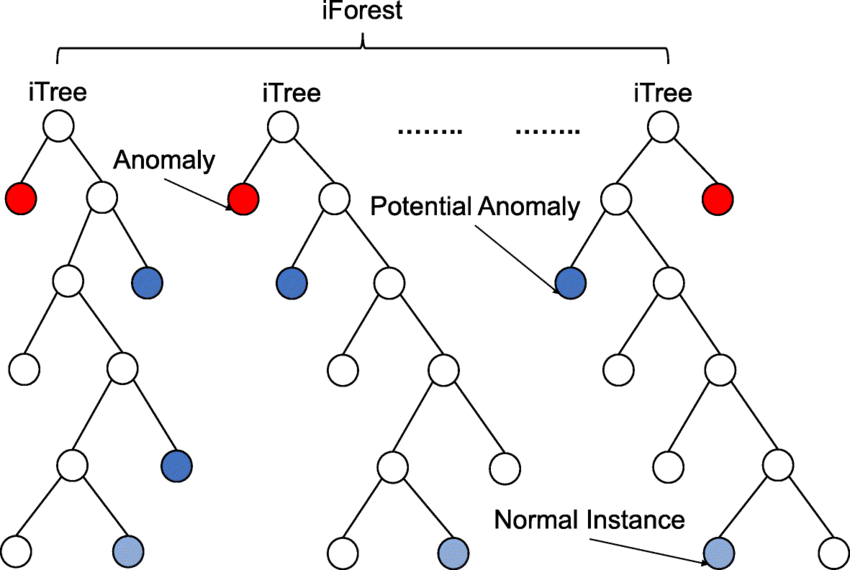

## Isolation Tree

In [7]:
import numpy as np
import random

def Isolation_Tree(X, X_real, index, depth, lim, depth_array):
    """
    Isolation Tree 遞迴構建函數，用於計算每個數據點的深度，以進行異常檢測。

    參數：
    X - numpy 數組，當前節點的數據子集。
    X_real - numpy 數組，完整的數據集。
    index - 當前節點數據子集的索引。
    depth - 當前節點的深度。
    lim - 最大遞迴深度。
    depth_array - numpy 數組，用於存儲每個數據點的深度。

    返回：
    depth_array - 更新後的深度數組。
    """
    # 當前深度達到限制時，返回深度數組
    if(depth == lim):
        return depth_array
    
    # 獲取數據集的特徵數量
    M = X.shape[1]
    
    # 隨機選擇一個特徵進行分割
    q = random.randint(0, M-1)
    
    # 在選定特徵的取值範圍內隨機選擇一個分割點
    p = random.uniform(np.min(X[:, q]), np.max(X[:, q]))
    
    # 根據分割點將數據分為兩部分
    BOOL = (X[:, q] < p)
    left_index, right_index = index[BOOL], index[~BOOL]
    
    # 打印當前深度及分割後的索引（調試用）
    # print(depth, left_index, right_index)
    
    # 若左子集僅有一個數據點且右子集也僅有一個數據點，則更新深度數組
    if(len(left_index) == 1 and len(right_index) == 1):
        depth_array[left_index] = depth
        depth_array[right_index] = depth
        return depth_array
    
    # 若左子集僅有一個數據點，則更新其深度並遞迴處理右子集
    elif(len(left_index) == 1):
        depth_array[left_index] = depth
        depth_array = Isolation_Tree(X[~BOOL], X_real, right_index, depth+1, lim, depth_array)
        return depth_array
    
    # 若右子集僅有一個數據點，則更新其深度並遞迴處理左子集
    elif(len(right_index) == 1):
        depth_array[right_index] = depth
        depth_array = Isolation_Tree(X[BOOL], X_real, left_index, depth+1, lim, depth_array)
        return depth_array
    
    # 若兩子集均有多個數據點，則分別遞迴處理左右子集
    else:
        depth_array = Isolation_Tree(X[BOOL], X_real, left_index, depth+1, lim, depth_array)
        depth_array = Isolation_Tree(X[~BOOL], X_real, right_index, depth+1, lim, depth_array)
        return depth_array


## Isolation Forest

In [8]:
N=X.shape[0]
sample_size=900
max_iter=30
threshold=4
lim=50
depth_array=np.ones((max_iter,N))*lim

for i in range(max_iter):
    real_index=np.array(sample(range(0,N), k=sample_size))
    depth_array[i]=Isolation_Tree(X[real_index],X,real_index,0,lim,depth_array[i])
outlier=np.array(np.where(np.sum(depth_array<threshold,axis=0)!=0)).flatten()
print(outlier)

[  8  37  63 122 147 161 164 181 187 195 201 224 228 238 256 263 362 384
 411 467 487 494 531 532 550 604 623 639 716 746 792 794 822 839 852 860
 862 875 880 944 963 970]


## Plot

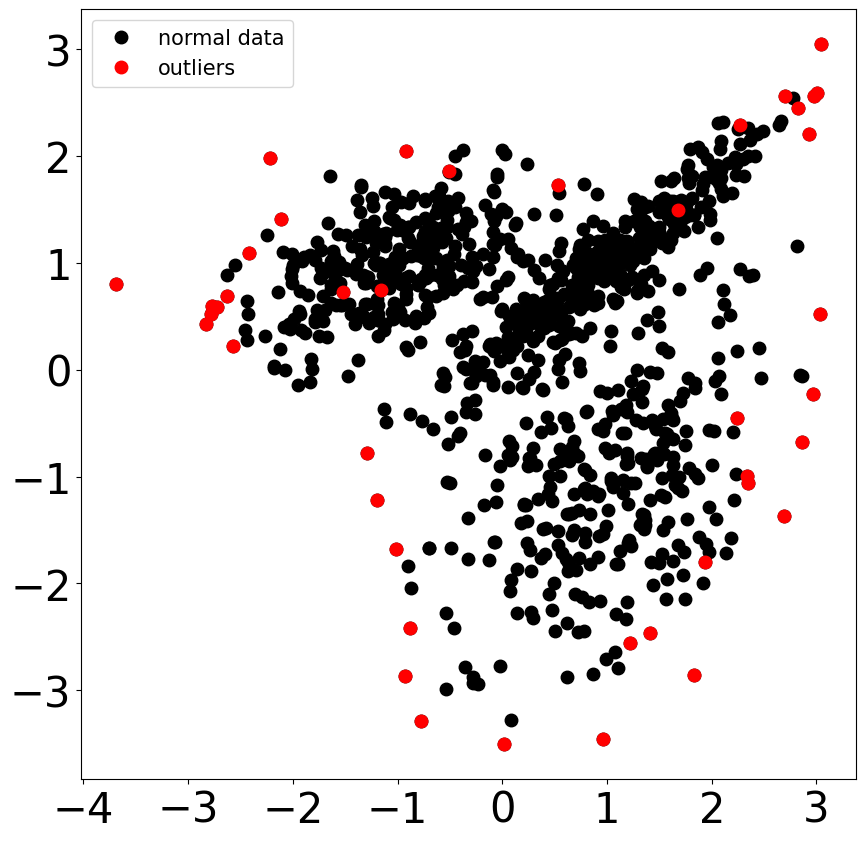

In [9]:

plt.rcParams["figure.figsize"] = (10,10)
plt.plot(X[:,0],X[:,1],"ko",markersize=9,label="normal data")
plt.plot(X[outlier,0],X[outlier,1],"ro",markersize=9,label="outliers")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=15)
plt.show()

# 總結

# 資料不平衡數據處理策略

在處理資料不平衡數據時，應該根據具體情況選擇適合的策略。以下是兩種策略的優缺點和使用建議：

## 策略1: 先進行多數類別和少數類別的數據平衡，再進行離群值處理

### 優點
1. **數據平衡**: 首先平衡數據能夠減少模型對多數類別的偏見，使模型更好地學習少數類別的特徵。
2. **一致性**: 平衡後的數據更能反映實際情況，有助於提升後續離群值檢測的準確性。

### 缺點
1. **離群值干擾**: 在平衡數據時，可能會增加數據中的離群值，特別是當使用過度抽樣（如SMOTE）方法時。
2. **計算成本**: 先進行平衡處理後的數據量可能大幅增加，增加後續離群值檢測的計算成本。

### 使用建議
- 當數據集中離群值較少且不太影響數據分布時，這種策略效果較好。
- 適用於數據平衡對模型性能影響較大的場景。

## 策略2: 先進行離群值處理，再進行多數類別和少數類別的數據平衡

### 優點
1. **清除噪聲**: 先處理離群值可以去除數據中的噪聲，避免這些噪聲影響後續的數據平衡和模型訓練。
2. **準確性**: 離群值處理後的數據更乾淨，有助於提升數據平衡和模型訓練的效果。

### 缺點
1. **信息丟失**: 可能會錯誤地將少數類別的部分重要數據視為離群值而刪除，導致信息丟失。
2. **難度增加**: 在不平衡數據中，離群值處理的準確性可能較低，增加了處理難度。

### 使用建議
- 當數據中存在較多的噪聲或離群值對模型性能影響較大時，這種策略較為有效。
- 適用於需要高準確性離群值檢測的場景。

## 綜合建議
選擇哪種策略應該根據具體的數據特徵和應用場景進行評估。以下是一些綜合建議：

1. **數據探索**: 在選擇策略之前，進行充分的數據探索和分析，了解數據分布、離群值和不平衡程度。
2. **交叉驗證**: 可以嘗試不同的策略並通過交叉驗證來評估其效果，選擇最能提升模型性能的方案。
3. **結合方法**: 根據具體需求，結合兩種策略。例如，先進行一次簡單的離群值處理，然後平衡數據，再進行更精細的離群值檢測。


ps: 我個人比較喜歡先處理離群值，再 oversampling 